In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
sns.set(
    rc={'figure.figsize':(11.7,8.27)}
)

# COVID-19 Data Analysis

This is an analysis of Covid-19 data. The data is taken from Johns Hopkins CSSE department, and available for educational purposes. Here is a reference to the dataset: https://github.com/CSSEGISandData/COVID-19

## Data Processing

The reports are made on a daily basis. We'll start by looking at the latest report.

In [4]:
daily_reports = glob.glob("../csse_covid_19_data/csse_covid_19_daily_reports/*.csv")
daily_reports.sort()
last_report = daily_reports[-1]
report = pd.read_csv(last_report)
last_report.split("/")[-1].split(".csv")[0]

'04-08-2020'

First, let's have a look at what the table looks like and what kind of data to expect

In [5]:
report[report["Country_Region"]=="Brazil"]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2725,NaN,NaN,NaN,Brazil,2020-04-08 22:51:39,-14.235,-51.9253,16170,819,127,15224,Brazil


In [6]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2603 non-null   float64
 1   Admin2          2614 non-null   object 
 2   Province_State  2703 non-null   object 
 3   Country_Region  2883 non-null   object 
 4   Last_Update     2883 non-null   object 
 5   Lat             2823 non-null   float64
 6   Long_           2823 non-null   float64
 7   Confirmed       2883 non-null   int64  
 8   Deaths          2883 non-null   int64  
 9   Recovered       2883 non-null   int64  
 10  Active          2883 non-null   int64  
 11  Combined_Key    2883 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 270.4+ KB


### Preprocessing

Before going into more analysis, we'll not focus on Latitude and Longitude for now. We'll also rename the column name for `Country/Region` and `Province/State`

In [7]:
report = report.drop(["Lat", "Long_", "FIPS", "Combined_Key"], axis=1)
report = report.rename(columns={"Province_State": "Sub_Area", "Country_Region": "Area"})

### Descriptive

In [8]:
report.describe()

,Confirmed,Deaths,Recovered,Active
count,2883.000000,2883.000000,2883.000000,2883.000000
mean,524.142907,30.640999,113.999653,238.892473
std,5638.119517,515.026579,1984.874098,3423.157161
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000,0.000000
max,148220.000000,17669.000000,64142.000000,95262.000000


Looking at the percentiles, the distribution seems to be strongly skewed. Let's have a look at the median.

In [9]:
report.median()

Confirmed    11.0
Deaths        0.0
Recovered     0.0
Active        0.0
dtype: float64

Let's get a feel for which country is the Median.

In [10]:
sorted_report_by_confirmed = report.sort_values(by="Confirmed", ascending=False)
sorted_report_by_confirmed.iloc[len(report)//2]

Admin2                       Erath
Sub_Area                     Texas
Area                            US
Last_Update    2020-04-08 22:51:58
Confirmed                       11
Deaths                           1
Recovered                        0
Active                           0
Name: 729, dtype: object

But before diving more into detail. Let's look at the total global numbers:

In [11]:
report.iloc[:,3:].sum()

Last_Update    2020-04-08 22:51:582020-04-08 22:51:582020-04-...
Confirmed                                                1511104
Deaths                                                     88338
Recovered                                                 328661
Active                                                    688727
dtype: object

In [12]:
sorted_report_by_confirmed.head(10)

,Admin2,Sub_Area,Area,Last_Update,Confirmed,Deaths,Recovered,Active
2856,NaN,NaN,Spain,2020-04-08 22:51:39,148220,14792,48021,85407
2784,NaN,NaN,Italy,2020-04-08 22:51:39,139422,17669,26491,95262
2765,NaN,NaN,Germany,2020-04-08 22:51:39,113296,2349,46300,64647
2761,NaN,NaN,France,2020-04-08 22:51:39,112950,10869,21254,80827
1687,New York City,New York,US,2020-04-08 22:51:58,81803,4571,0,0
2650,NaN,Hubei,China,2020-04-08 00:37:38,67803,3213,64142,448
2780,NaN,NaN,Iran,2020-04-08 22:51:39,64586,3993,29812,30781
2874,NaN,NaN,United Kingdom,2020-04-08 22:51:39,60733,7097,135,53501
2870,NaN,NaN,Turkey,2020-04-08 22:51:39,38226,812,1846,35568
2718,NaN,NaN,Belgium,2020-04-08 22:51:39,23403,2240,4681,16482


We can see that New York State in the US seems to be a Corona hotspot. But are those all the cases from the US?

In [13]:
us_cases = sum(report[report["Area"] == "US"]["Confirmed"])
print(us_cases)

429052


Let's look at the sum of the cases grouped by country.

In [14]:
sum_over_region = report.groupby("Area").sum()
sum_over_region = sum_over_region.sort_values(by="Confirmed", ascending=False)
sum_over_region = sum_over_region.reset_index()
sum_over_region.head(10)

,Area,Confirmed,Deaths,Recovered,Active
0,US,429052,14695,23559,0
1,Spain,148220,14792,48021,85407
2,Italy,139422,17669,26491,95262
3,France,113959,10887,21452,81620
4,Germany,113296,2349,46300,64647
5,China,82809,3337,77567,1905
6,Iran,64586,3993,29812,30781
7,United Kingdom,61474,7111,345,54018
8,Turkey,38226,812,1846,35568
9,Belgium,23403,2240,4681,16482


Let's fix the value for active cases in the US

In [15]:
sum_over_region["Active"] = sum_over_region["Confirmed"] - sum_over_region["Deaths"] - sum_over_region["Recovered"]

In [16]:
sum_over_region.head(10)

,Area,Confirmed,Deaths,Recovered,Active
0,US,429052,14695,23559,390798
1,Spain,148220,14792,48021,85407
2,Italy,139422,17669,26491,95262
3,France,113959,10887,21452,81620
4,Germany,113296,2349,46300,64647
5,China,82809,3337,77567,1905
6,Iran,64586,3993,29812,30781
7,United Kingdom,61474,7111,345,54018
8,Turkey,38226,812,1846,35568
9,Belgium,23403,2240,4681,16482


This perspective also changes the median:

In [17]:
sum_over_region.iloc[len(sum_over_region)//2]

Area         Niger
Confirmed      342
Deaths          11
Recovered       28
Active         303
Name: 92, dtype: object

In [18]:
sum_over_region.sort_values(by="Deaths", ascending=False).head(10)

,Area,Confirmed,Deaths,Recovered,Active
2,Italy,139422,17669,26491,95262
1,Spain,148220,14792,48021,85407
0,US,429052,14695,23559,390798
3,France,113959,10887,21452,81620
7,United Kingdom,61474,7111,345,54018
6,Iran,64586,3993,29812,30781
5,China,82809,3337,77567,1905
4,Germany,113296,2349,46300,64647
11,Netherlands,20682,2255,272,18155
9,Belgium,23403,2240,4681,16482


## Data Visualisations

Total number of confirmed cases.

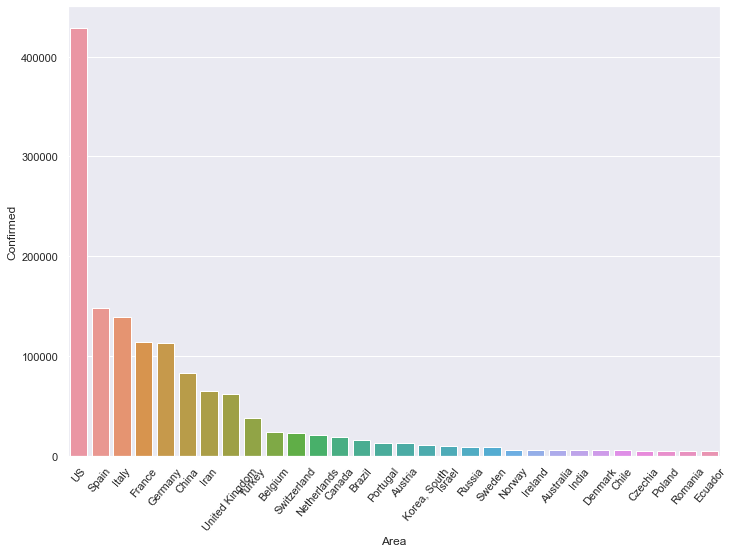

In [19]:
ax = sns.barplot(x="Area", y="Confirmed", data=sum_over_region.head(30))
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

Confirmed cases over Deadly Cases

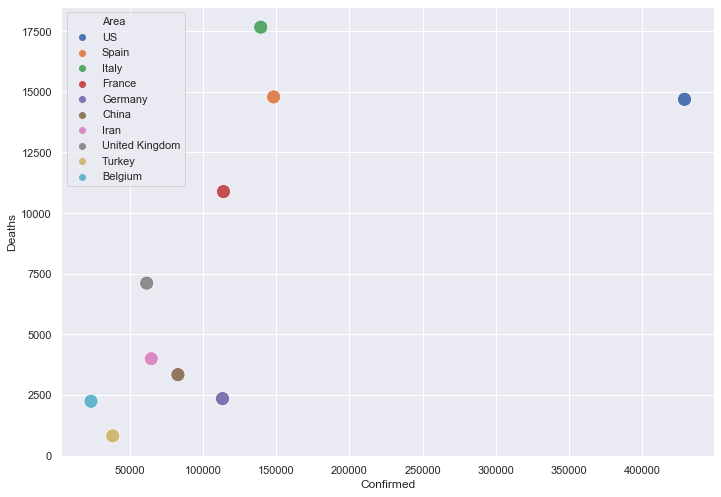

In [20]:
sns.scatterplot(x="Confirmed", y="Deaths",
            hue="Area", s=200,
            data=sum_over_region.head(10));

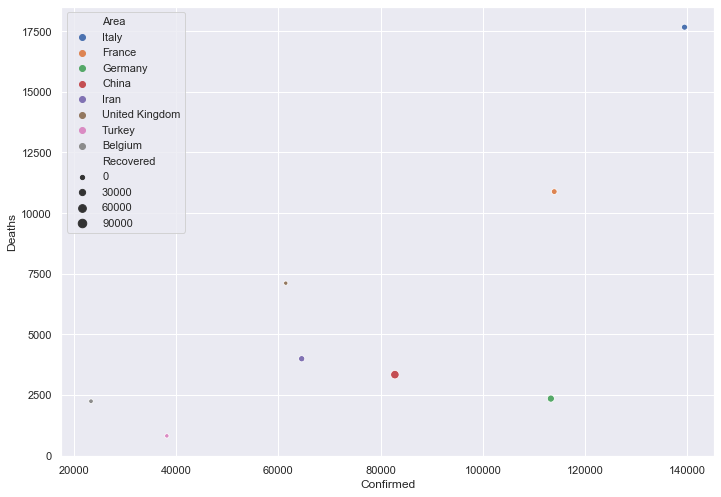

In [21]:
sns.scatterplot(x="Confirmed", y="Deaths",
            hue="Area", size="Recovered",
            data=sum_over_region[2:].head(8));

### Combined Numbers for top countries with most confirmed cases

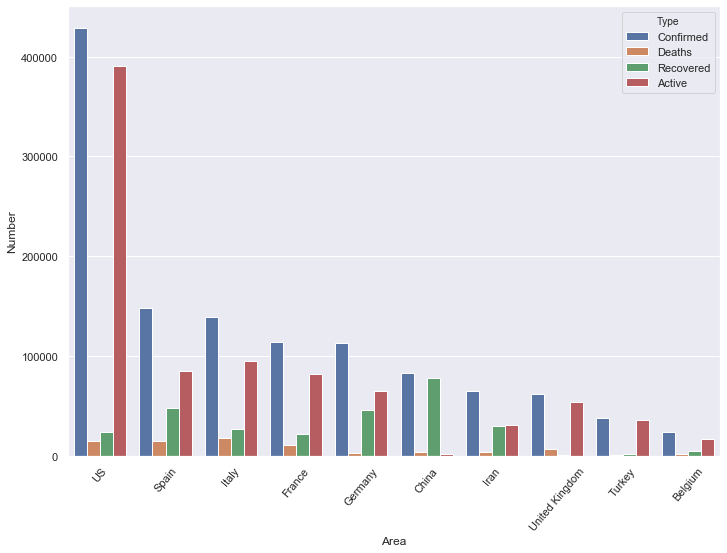

In [22]:
melted_summary = pd.melt(sum_over_region.head(10), id_vars="Area", var_name="Type", value_name="Number")
ax = sns.barplot(x='Area', y='Number', hue='Type', data=melted_summary)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

In [23]:
n = 8

### Distribution of confirmed cases and deadly cases across countries

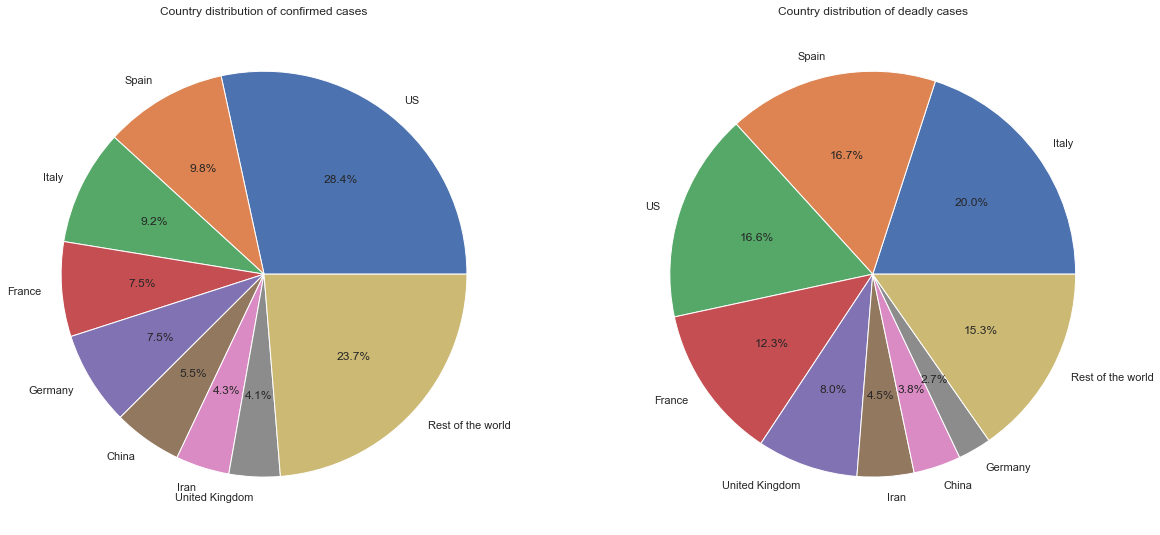

In [24]:
plt.figure(1, figsize=(20,10))
the_grid = plt.GridSpec(1, 2)

sum_over_region_sort_deaths = sum_over_region.sort_values(by="Deaths",ascending=False)

death_top_n = sum_over_region_sort_deaths["Deaths"].head(n)
confirmed_top_n = sum_over_region["Confirmed"].head(n)
countries_top_n_confirmed = sum_over_region["Area"].head(n)
countries_top_n_death = sum_over_region_sort_deaths["Area"].head(n)
total_death_after_top_n = sum(sum_over_region_sort_deaths["Deaths"].iloc[n:])
total_confirmed_after_top_n = sum(sum_over_region["Confirmed"].iloc[n:])

death_top_n = death_top_n.append(pd.Series([total_death_after_top_n]))
confirmed_top_n = confirmed_top_n.append(pd.Series([total_confirmed_after_top_n]))
countries_top_n_confirmed = countries_top_n_confirmed.append(pd.Series(["Rest of the world"]))
countries_top_n_death = countries_top_n_death.append(pd.Series(["Rest of the world"]))

plt.subplot(the_grid[0, 0], aspect=1, title='Country distribution of confirmed cases')
confirmed_pie = plt.pie(confirmed_top_n, labels=countries_top_n_confirmed, autopct='%1.1f%%')
plt.subplot(the_grid[0, 1], aspect=1, title='Country distribution of deadly cases')
death_pie = plt.pie(death_top_n, labels=countries_top_n_death, autopct='%1.1f%%')

Let's have a quick look at the rate of deadly cases per country to identify the most vulnerable countries.

### Death Rate

In [25]:
sum_over_region["Deadly Case Rate"] = sum_over_region["Deaths"]/sum_over_region["Confirmed"]

Let's order by the death rate and look at the countries with the highest rate of deadly cases.

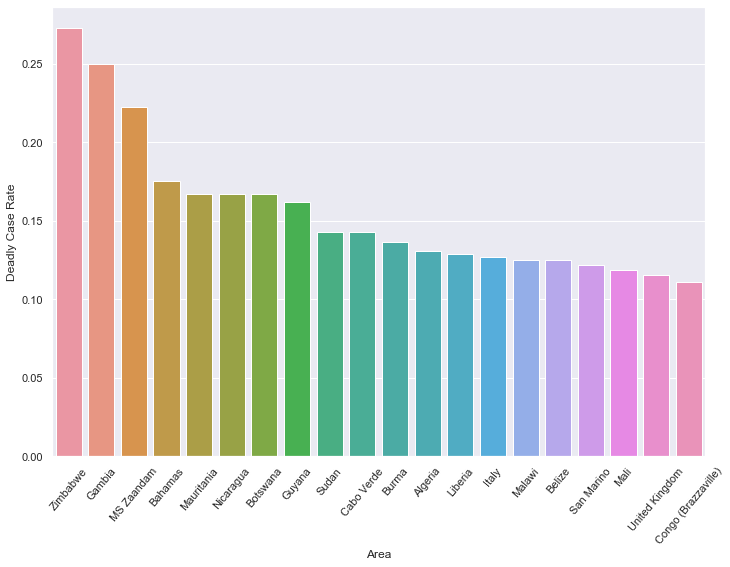

In [26]:
sum_sorted_by_death_rate = sum_over_region.sort_values(by='Deadly Case Rate', ascending=False).head(20).reset_index()
ax = sns.barplot(x='Area', y='Deadly Case Rate', data=sum_sorted_by_death_rate)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

That's a frightening picture, but is it representative?

Let's look at the companies with a given minimum number of deaths to make this statistically more significant.

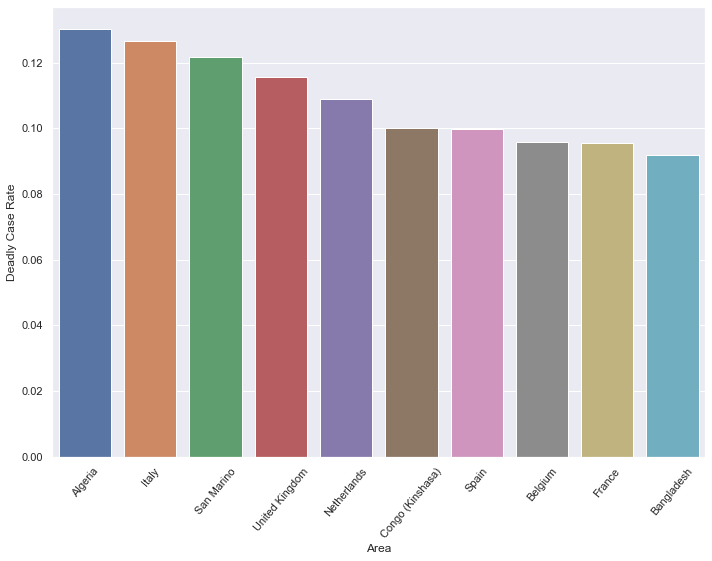

In [27]:
minimum_deaths = 10
sum_sorted_by_death_rate_minimum_deaths = sum_over_region[sum_over_region["Deaths"]>minimum_deaths].sort_values(by='Deadly Case Rate', ascending=False).head(10).reset_index()
ax = sns.barplot(x='Area', y='Deadly Case Rate', data=sum_sorted_by_death_rate_minimum_deaths)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

Let's look at death rate ordered by confirmed cases

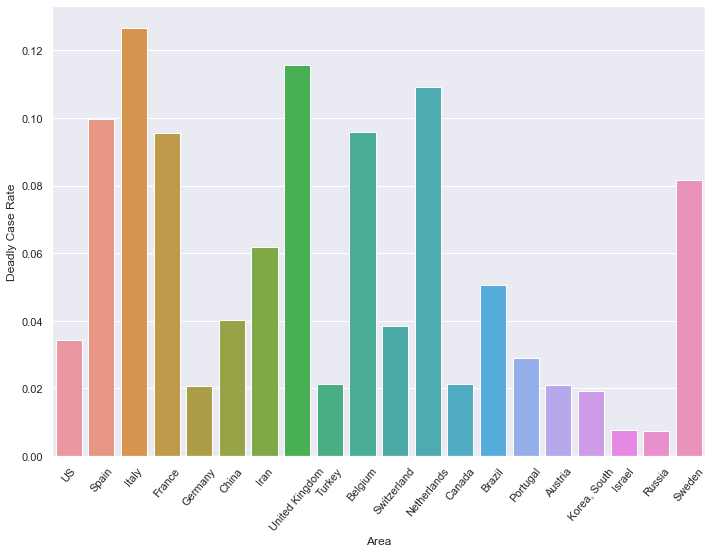

In [28]:
ax = sns.barplot(x='Area', y='Deadly Case Rate', data=sum_over_region.head(20).reset_index())
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

### Normalized by population

Now we know the distribution of cases and the absolute mortality for each country. But these numbers need a bit of context. The gravity for a country needs to be measured in relative terms with respect to the country's population. We'll add some population information for each country

In [29]:
from datapackage import Package

package = Package('https://datahub.io/JohnSnowLabs/population-figures-by-country/datapackage.json')

Here is the yearly population for some countries from Year-0 (now) to some years in the past, e.g. Year-56

In [30]:
# print processed tabular data (if exists any)
country_population = pd.DataFrame(package.resources[1].read())
country_population.columns = ["Area", "Country Code"] + ["Year-{}".format(n) for n in range(len(country_population.columns)-2)][::-1]
country_population[[country in ["Spain", "Germany", "Norway", "Brazil", "Sweden", "Russia", "United States"] for country in country_population.iloc[:,0]]]

,Area,Country Code,Year-56,Year-55,Year-54,Year-53,Year-52,Year-51,Year-50,Year-49,...,Year-9,Year-8,Year-7,Year-6,Year-5,Year-4,Year-3,Year-2,Year-1,Year-0
27,Brazil,BRA,72207554.0,74351763.0,76573248.0,78854019.0,81168654.0,83498020.0,85837799.0,88191378.0,...,191026637,192979029,194895996,196796269,198686688,200560983,202408632,204213133,205962108,207652865.0
53,Germany,DEU,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,76600311.0,76951336.0,...,82266372,82110097,81902307,81776930,80274983,80425823,80645605,80982500,81686611,82667685.0
68,Spain,ESP,30455000.0,30739250.0,31023366.0,31296651.0,31609195.0,31954292.0,32283194.0,32682947.0,...,45226803,45954106,46362946,46576897,46742697,46773055,46620045,46480882,46447697,46443959.0
174,Norway,NOR,3581239.0,3609800.0,3638918.0,3666537.0,3694339.0,3723168.0,3753012.0,3784539.0,...,4709153,4768212,4828726,4889252,4953088,5018573,5079623,5137232,5188607,5232929.0
220,Sweden,SWE,7484656.0,7519998.0,7561588.0,7604328.0,7661354.0,7733853.0,7807797.0,7867931.0,...,9148092,9219637,9298515,9378126,9449213,9519374,9600379,9696110,9799186,9903122.0
248,United States,USA,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,...,301231207,304093966,306771529,309348193,311663358,313998379,316204908,318563456,320896618,323127513.0


In [31]:
sum_over_region = sum_over_region.set_index("Area")

Join the Covid-19 table with the population numbers

In [32]:
sum_over_region.join(country_population.set_index("Area")).head(5)

,Confirmed,Deaths,Recovered,Active,Deadly Case Rate,Country Code,Year-56,Year-55,Year-54,Year-53,...,Year-9,Year-8,Year-7,Year-6,Year-5,Year-4,Year-3,Year-2,Year-1,Year-0
Area,,,,,,,,,,,,,,,,,,,,,
US,429052,14695,23559,390798,0.034250,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,148220,14792,48021,85407,0.099798,ESP,30455000.0,30739250.0,31023366.0,31296651.0,...,45226803,45954106,46362946,46576897,46742697,46773055,46620045,46480882,46447697,46443959.0
Italy,139422,17669,26491,95262,0.126730,ITA,50199700.0,50536350.0,50879450.0,51252000.0,...,58438310,58826731,59095365,59277417,59379449,59539717,60233948,60789140,60730582,60600590.0
France,113959,10887,21452,81620,0.095534,FRA,46814237.0,47444751.0,48119649.0,48803680.0,...,64016229,64374990,64707044,65027512,65342776,65659790,65998570,66331957,66624068,66896109.0
Germany,113296,2349,46300,64647,0.020733,DEU,72814900.0,73377632.0,74025784.0,74714353.0,...,82266372,82110097,81902307,81776930,80274983,80425823,80645605,80982500,81686611,82667685.0


We can see that "US" doesn't get the right data, because it is called "United States" in the population table

In [33]:
sum_over_region = sum_over_region.rename(index={"US":"United States"})
country_population = country_population.set_index("Area").rename(index={"Iran, Islamic Rep.": "Iran", "Korea, Rep.": "Korea, South"}).reset_index()

In [34]:
sum_over_region = sum_over_region.join(country_population.set_index("Area"))
population = sum_over_region.iloc[:,-1]
sum_over_region = sum_over_region.iloc[:,:6]
sum_over_region["Population"] = population

In [35]:
sum_over_region.head(10)

,Confirmed,Deaths,Recovered,Active,Deadly Case Rate,Country Code,Population
Area,,,,,,,
United States,429052,14695,23559,390798,0.034250,USA,3.231275e+08
Spain,148220,14792,48021,85407,0.099798,ESP,4.644396e+07
Italy,139422,17669,26491,95262,0.126730,ITA,6.060059e+07
France,113959,10887,21452,81620,0.095534,FRA,6.689611e+07
Germany,113296,2349,46300,64647,0.020733,DEU,8.266768e+07
China,82809,3337,77567,1905,0.040298,CHN,1.378665e+09
Iran,64586,3993,29812,30781,0.061825,IRN,8.027743e+07
United Kingdom,61474,7111,345,54018,0.115675,GBR,6.563724e+07
Turkey,38226,812,1846,35568,0.021242,TUR,7.951243e+07


#### Population Graph

Looking at the population distribution of the countries with most cases

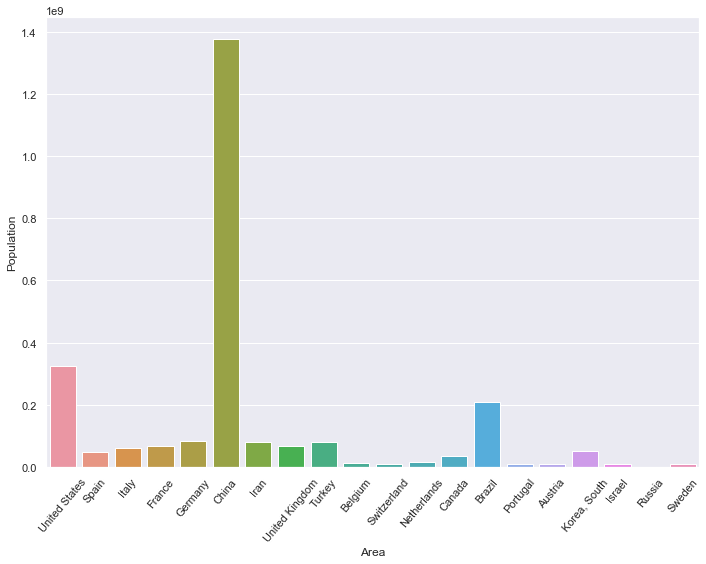

In [36]:
ax = sns.barplot(x='Area', y='Population', data=sum_over_region.head(20).reset_index())
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

#### Confirmed and deadly cases normalized by inhabitants

In [37]:
sum_over_region["Confirmed per 100,000 inhabitants"] = sum_over_region["Confirmed"]*100000/sum_over_region["Population"]
sum_over_region["Deaths per 100,000 inhabitants"] = sum_over_region["Deaths"]*100000/sum_over_region["Population"]

Order by confirmed cases

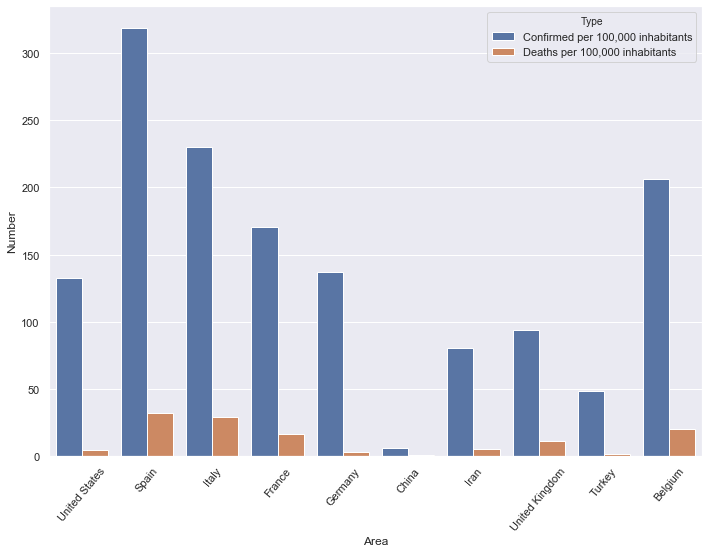

In [38]:
melted_summary = pd.melt(sum_over_region.drop(["Population", "Confirmed", "Deaths", "Recovered", "Active", "Deadly Case Rate", "Country Code"], axis=1).reset_index().head(10), id_vars="Area", var_name="Type", value_name="Number")
ax = sns.barplot(x='Area', y='Number', hue='Type', data=melted_summary)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

#### Order by Confirmed cases per 100,000 inhabitants

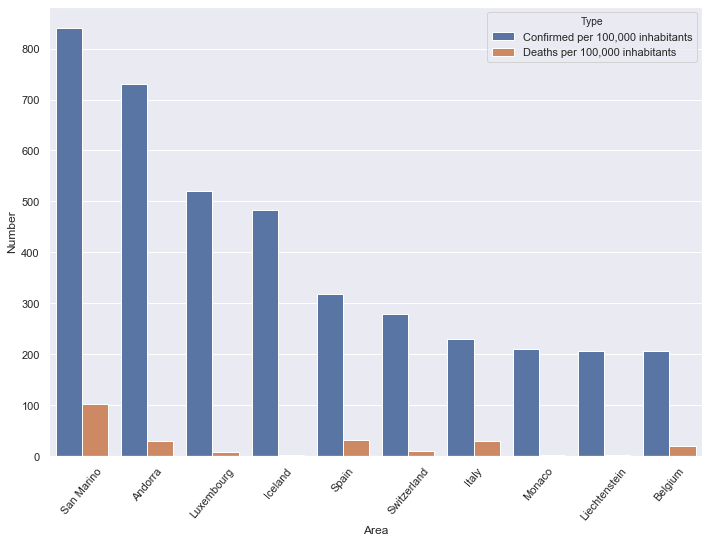

In [39]:
melted_summary = pd.melt(sum_over_region.sort_values(by="Confirmed per 100,000 inhabitants", ascending=False).reset_index().drop(["Population", "Confirmed", "Deaths", "Recovered", "Active", "Deadly Case Rate", "Country Code"], axis=1).head(10), id_vars="Area", var_name="Type", value_name="Number")
ax = sns.barplot(x='Area', y='Number', hue='Type', data=melted_summary.reset_index())
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

#### Order by Deadly cases per 100,000 inhabitants

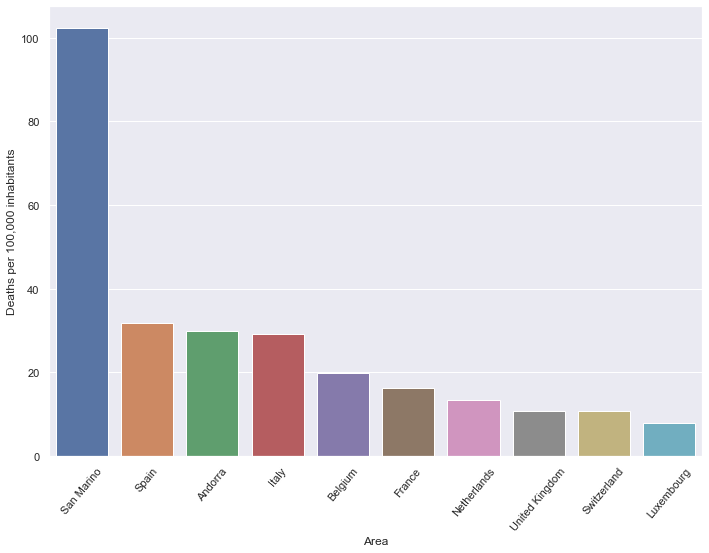

In [40]:
ax = sns.barplot(x='Area', y='Deaths per 100,000 inhabitants', data=sum_over_region.reset_index().sort_values(by="Deaths per 100,000 inhabitants", ascending=False).head(10))
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

### Analysis over time for specific countries

In [41]:
from datetime import datetime

In [42]:
all_reports = {datetime.strptime(rep.split("/")[-1].split(".csv")[0], '%m-%d-%Y'):pd.read_csv(rep) for rep in daily_reports}

In [43]:
report_time = all_reports[list(all_reports.keys())[-1]]
report_time = report_time.rename(columns={"Confirmed":"Confirmed_{}".format(list(all_reports.keys())[-1]), "Deaths":"Deaths_{}".format(list(all_reports.keys())[-1]), "Recovered":"Recovered_{}".format(list(all_reports.keys())[-1]), "Country_Region":"Area", 'Country/Region':"Area"})
report_time = report_time.groupby("Area").sum().reset_index()

deaths = confirmed = recovered = report_time[["Area"]].set_index("Area")

report_time = report_time.set_index("Area")

for date,rep in all_reports.items():
    rep=rep.rename(columns={"Country_Region":"Area", "Country/Region":"Area"})
    rep=rep[["Area", "Confirmed", "Deaths", "Recovered"]]
    rep = rep.groupby("Area").sum().reset_index()
    
    report_time = report_time.join(rep.set_index("Area"), rsuffix="_{}".format(date), how="outer")
    deaths = deaths.join(rep.set_index("Area")["Deaths"], how="outer")
    confirmed = confirmed.join(rep.set_index("Area")["Confirmed"], how="outer")
    recovered = recovered.join(rep.set_index("Area")["Recovered"], how="outer")
    
    deaths = deaths.rename(columns={"Deaths":date})
    recovered = recovered.rename(columns={"Recovered":date})
    confirmed = confirmed.rename(columns={"Confirmed":date})


In [44]:
confirmed

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08
Area,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,170.0,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0,444.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584.0,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,370.0,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.0,119.0,134.0,161.0,194.0,217.0,237.0,254.0,261.0,263.0
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,35.0,36.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0


In [45]:
def get_top_n (data, n=10, country_list=[], total=True, sort_by_index=-1, every_x_days=1):
    #select countries
    if country_list:
        top_countries = data.T[country_list].reset_index()
    else: 
        top_countries = data.sort_values(by=data.columns[sort_by_index],ascending=False).head(n).T.reset_index()
      
    # determine total if necessary
    if total:
        top_countries["Total"] = list(data.sum())
    
    #smooth graph by only keeping every xth day
    keep_list = [x%every_x_days==0 for x in range(len(top_countries))]
    dates = top_countries.reset_index()["index"][keep_list]
    top_countries = top_countries.groupby(top_countries.index // every_x_days).mean()
    top_countries["Date"] = list(dates)

    return top_countries

def draw_top_n (data, n=10, country_list=[], total=True, sort_by_index=-1, log_scale=False, every_x_days=1):
    top_countries = get_top_n (data, n, country_list, total, sort_by_index, every_x_days)
    
    # melt data frame
    melted_summary = pd.melt(top_countries, id_vars="Date", var_name="Country", value_name="Number")
    
    f, ax = plt.subplots()
    if log_scale:
        ax.set(yscale="log")
    plot = sns.lineplot(x="Date", y="Number",
                 hue="Country",
                 data=melted_summary.reset_index(), ax=ax)

#### Confirmed Cases over time for different countries

Looking at the countries with the highest number of confirmed cases

China and South Korea don't have the correct data for the past. This is because the data source used different names over time.

In [46]:
confirmed = confirmed.reset_index().replace({'Area': {'Mainland China':'China', "Korea, South": "South Korea", "Republic of Korea": "South Korea", "Iran (Islamic Republic of)": "Iran"}}).groupby('Area', sort=False).sum()
deaths = deaths.reset_index().replace({'Area': {'Mainland China':'China', "Korea, South": "South Korea", "Republic of Korea": "South Korea", "Iran (Islamic Republic of)": "Iran"}}).groupby('Area', sort=False).sum()
recovered = recovered.reset_index().replace({'Area': {'Mainland China':'China', "Korea, South": "South Korea", "Republic of Korea": "South Korea", "Iran (Islamic Republic of)": "Iran"}}).groupby('Area', sort=False).sum()

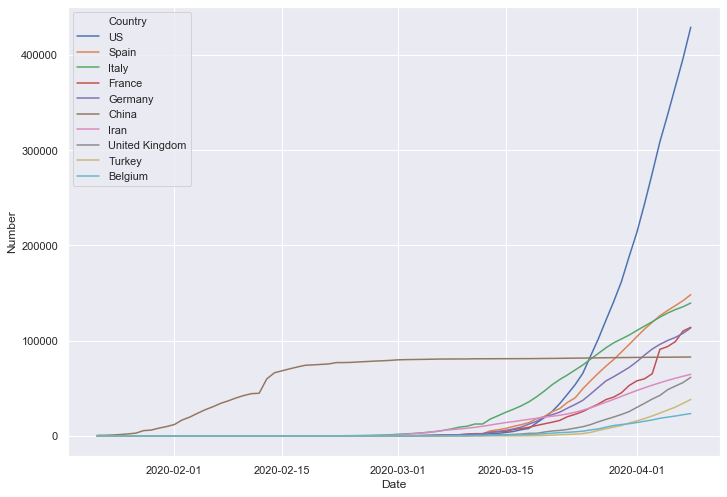

In [47]:
draw_top_n(confirmed, total=False, n=10)

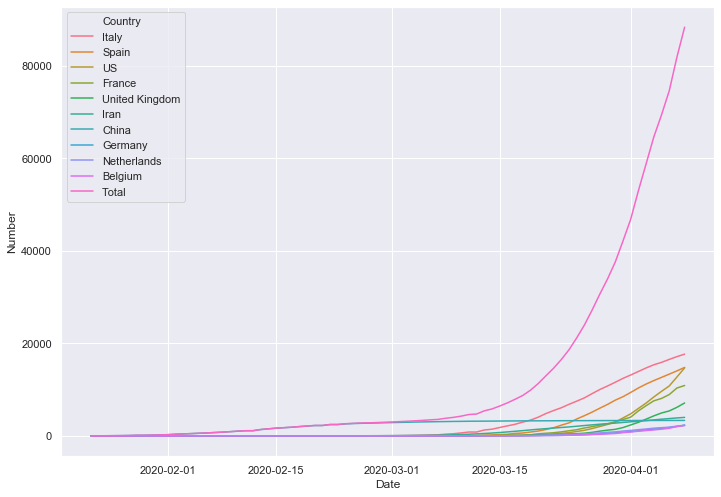

In [48]:
draw_top_n(deaths, total=True)

Having a look at the growth rate

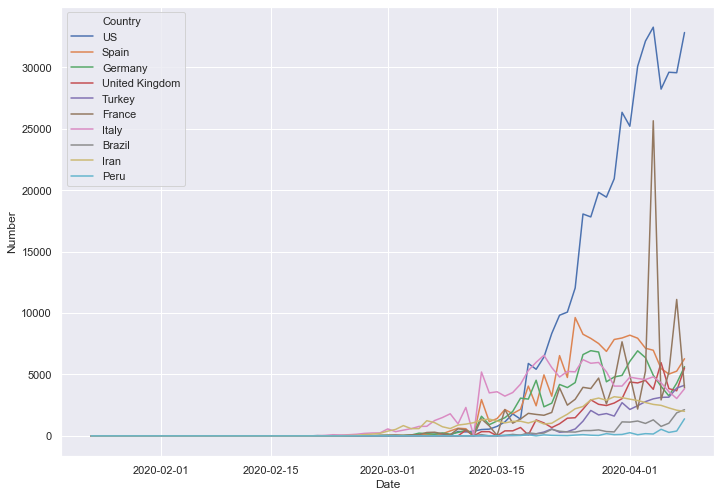

In [49]:
draw_top_n(confirmed.diff(axis=1), total=False)

The above doesn't look very nice so let's visualize it a bit nicer and restrict to some specific countries.

In [50]:
countries_to_look_at = ["Italy", "China", "Spain", "US"]

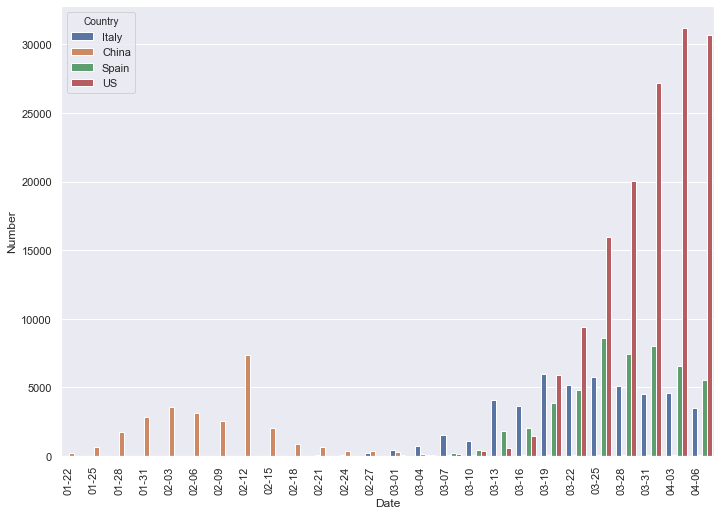

In [51]:
d = get_top_n(confirmed.diff(axis=1), country_list=countries_to_look_at, total=False, every_x_days=3)
melted_summary = pd.melt(d, id_vars="Date", var_name="Country", value_name="Number")
f, ax = plt.subplots()
# ax.set(yscale="log")
plot = sns.barplot(x='Date', y='Number', hue='Country', data=melted_summary, ax=ax)
x_dates = melted_summary['Date'].dt.strftime('%m-%d')
ticks = ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')